In [1]:
import pandas as pd
import seaborn as sb
import scipy
import numpy as np
import math
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
#load dataframe
data_frame = pd.read_csv('processed data.csv')
data_frame

,Unnamed: 0,Year,Month,Date,Hour,Day,PM10,PM2.5,PM1,Ambient Temperature,Relative Humidity,Precipitation,PM10 AQI,PM10 Classification,PM2.5 AQI,PM2.5 Classification,PM1 AQI,PM1 Classification
0,0,2011,1,1,1,Saturday,98.426,81.059,75.169,16.7,89,0.0,72.282828,Moderate,164.166491,Unhealthy,112.868704,Hazardous
1,1,2011,1,1,2,Saturday,77.019,69.875,66.387,16.8,89,0.0,61.888889,Moderate,158.383562,Unhealthy,103.709378,Hazardous
2,2,2011,1,1,3,Saturday,69.934,63.872,60.757,16.8,85,0.0,57.929293,Moderate,155.285564,Unhealthy,97.836143,Hazardous
3,3,2011,1,1,4,Saturday,66.712,59.360,56.094,16.7,82,0.0,56.444444,Moderate,152.962065,Unhealthy,92.974816,Hazardous
4,4,2011,1,1,5,Saturday,68.147,60.626,57.466,16.5,80,0.0,57.434343,Moderate,153.633298,Unhealthy,94.404004,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43470,43470,2016,12,31,20,Saturday,124.389,109.399,102.636,19.6,62,0.0,85.151515,Moderate,178.778714,Unhealthy,237.296664,Hazardous
43471,43471,2016,12,31,21,Saturday,126.786,110.995,103.433,19.5,67,0.0,86.141414,Moderate,179.604847,Unhealthy,237.825017,Hazardous
43472,43472,2016,12,31,22,Saturday,123.234,109.994,103.692,19.2,69,0.0,84.656566,Moderate,179.088514,Unhealthy,237.996731,Hazardous
43473,43473,2016,12,31,23,Saturday,117.936,106.999,101.634,19.1,70,0.0,81.686869,Moderate,177.539515,Unhealthy,236.636224,Hazardous


In [3]:
data_frame.describe()

,Unnamed: 0,Year,Month,Date,Hour,PM10,PM2.5,PM1,Ambient Temperature,Relative Humidity,Precipitation,PM10 AQI,PM2.5 AQI,PM1 AQI
count,43475.000000,43475.000000,43475.000000,43475.000000,43475.000000,43475.000000,43475.000000,43475.000000,43475.000000,43475.000000,43475.000000,43475.000000,43475.000000,43475.000000
mean,21737.000000,2013.442093,6.269281,15.490029,11.491915,73.754011,49.779629,40.264468,24.161523,80.627947,0.175873,56.052814,116.464656,122.709554
std,12550.295813,1.745076,3.434669,8.817159,6.933775,50.308928,34.481849,30.166408,5.856508,13.730304,1.660878,29.042310,44.852170,51.829827
min,0.000000,2011.000000,1.000000,1.000000,0.000000,7.660000,5.920700,4.263480,5.700000,19.000000,0.000000,6.481481,24.583333,32.769347
25%,10868.500000,2012.000000,3.000000,8.000000,5.000000,37.953900,25.097950,18.688400,19.900000,72.000000,0.000000,34.259259,78.128755,94.147277
50%,21737.000000,2013.000000,6.000000,15.000000,11.000000,60.587000,40.285800,31.339700,25.300000,85.000000,0.000000,53.474747,112.572864,129.530875
75%,32605.500000,2015.000000,9.000000,23.000000,18.000000,95.561500,64.233000,52.113000,28.300000,92.000000,0.000000,70.797980,155.492097,135.510011
max,43474.000000,2017.000000,12.000000,31.000000,23.000000,324.389000,213.584000,179.915000,38.800000,100.000000,88.600000,185.151515,263.432432,288.335490


In [4]:
data_frame = data_frame.drop(data_frame.columns[[0]], axis = 1)
data_frame

,Year,Month,Date,Hour,Day,PM10,PM2.5,PM1,Ambient Temperature,Relative Humidity,Precipitation,PM10 AQI,PM10 Classification,PM2.5 AQI,PM2.5 Classification,PM1 AQI,PM1 Classification
0,2011,1,1,1,Saturday,98.426,81.059,75.169,16.7,89,0.0,72.282828,Moderate,164.166491,Unhealthy,112.868704,Hazardous
1,2011,1,1,2,Saturday,77.019,69.875,66.387,16.8,89,0.0,61.888889,Moderate,158.383562,Unhealthy,103.709378,Hazardous
2,2011,1,1,3,Saturday,69.934,63.872,60.757,16.8,85,0.0,57.929293,Moderate,155.285564,Unhealthy,97.836143,Hazardous
3,2011,1,1,4,Saturday,66.712,59.360,56.094,16.7,82,0.0,56.444444,Moderate,152.962065,Unhealthy,92.974816,Hazardous
4,2011,1,1,5,Saturday,68.147,60.626,57.466,16.5,80,0.0,57.434343,Moderate,153.633298,Unhealthy,94.404004,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43470,2016,12,31,20,Saturday,124.389,109.399,102.636,19.6,62,0.0,85.151515,Moderate,178.778714,Unhealthy,237.296664,Hazardous
43471,2016,12,31,21,Saturday,126.786,110.995,103.433,19.5,67,0.0,86.141414,Moderate,179.604847,Unhealthy,237.825017,Hazardous
43472,2016,12,31,22,Saturday,123.234,109.994,103.692,19.2,69,0.0,84.656566,Moderate,179.088514,Unhealthy,237.996731,Hazardous
43473,2016,12,31,23,Saturday,117.936,106.999,101.634,19.1,70,0.0,81.686869,Moderate,177.539515,Unhealthy,236.636224,Hazardous


In [5]:
#Average PM levels plotted against month
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y1 = []
y2 = []
y3 = []

#add temperature

jan = data_frame[data_frame.Month == 1]
c_avg = jan.PM10.mean()
y1.append(c_avg)
f_avg = jan['PM2.5'].mean()
y2.append(f_avg)
u_avg = jan.PM1.mean()
y3.append(u_avg)

feb = data_frame[data_frame.Month == 2]
c_avg = feb.PM10.mean()
y1.append(c_avg)
f_avg = feb['PM2.5'].mean()
y2.append(f_avg)
u_avg = feb.PM1.mean()
y3.append(u_avg)

mar = data_frame[data_frame.Month == 3]
c_avg = mar.PM10.mean()
y1.append(c_avg)
f_avg = mar['PM2.5'].mean()
y2.append(f_avg)
u_avg = mar.PM1.mean()
y3.append(u_avg)

apr = data_frame[data_frame.Month == 4]
c_avg = apr.PM10.mean()
y1.append(c_avg)
f_avg = apr['PM2.5'].mean()
y2.append(f_avg)
u_avg = apr.PM1.mean()
y3.append(u_avg)

may = data_frame[data_frame.Month == 5]
c_avg = may.PM10.mean()
y1.append(c_avg)
f_avg = may['PM2.5'].mean()
y2.append(f_avg)
u_avg = may.PM1.mean()
y3.append(u_avg)

jun = data_frame[data_frame.Month == 6]
c_avg = jun.PM10.mean()
y1.append(c_avg)
f_avg = jun['PM2.5'].mean()
y2.append(f_avg)
u_avg = jun.PM1.mean()
y3.append(u_avg)

jul = data_frame[data_frame.Month == 7]
c_avg = jul.PM10.mean()
y1.append(c_avg)
f_avg = jul['PM2.5'].mean()
y2.append(f_avg)
u_avg = jul.PM1.mean()
y3.append(u_avg)

aug = data_frame[data_frame.Month == 8]
c_avg = aug.PM10.mean()
y1.append(c_avg)
f_avg = aug['PM2.5'].mean()
y2.append(f_avg)
u_avg = aug.PM1.mean()
y3.append(u_avg)

sep = data_frame[data_frame.Month == 9]
c_avg = sep.PM10.mean()
y1.append(c_avg)
f_avg = sep['PM2.5'].mean()
y2.append(f_avg)
u_avg = sep.PM1.mean()
y3.append(u_avg)

octo = data_frame[data_frame.Month == 10]
c_avg = octo.PM10.mean()
y1.append(c_avg)
f_avg = octo['PM2.5'].mean()
y2.append(f_avg)
u_avg = octo.PM1.mean()
y3.append(u_avg)

nov = data_frame[data_frame.Month == 11]
c_avg = nov.PM10.mean()
y1.append(c_avg)
f_avg = nov['PM2.5'].mean()
y2.append(f_avg)
u_avg = nov.PM1.mean()
y3.append(u_avg)

dec = data_frame[data_frame.Month == 12]
c_avg = dec.PM10.mean()
y1.append(c_avg)
f_avg = dec['PM2.5'].mean()
y2.append(f_avg)
u_avg = dec.PM1.mean()
y3.append(u_avg)

Text(0, 0.5, 'Avg PM in ug/mm3')

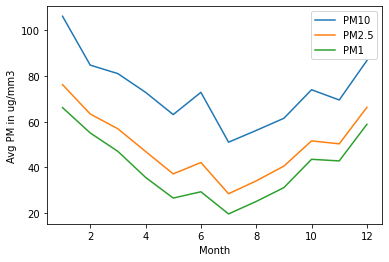

In [6]:
#Plot the results
plt.plot(x, y1)

plt.plot(x, y2)

plt.plot(x, y3)

plt.legend(["PM10", "PM2.5", "PM1"])

plt.xlabel("Month")
plt.ylabel("Avg PM in ug/mm3")

In [7]:
#Add humidity and precipitation
#Additionally, construct new dataframe
y4 = []
y5 = []
y6 = []

hum = jan['Relative Humidity'].mean()
y4.append(hum)
prec = jan.Precipitation.mean()
y5.append(prec)
temp = jan['Ambient Temperature'].mean()
y6.append(temp)

hum = feb['Relative Humidity'].mean()
y4.append(hum)
prec = feb.Precipitation.mean()
y5.append(prec)
temp = feb['Ambient Temperature'].mean()
y6.append(temp)

hum = mar['Relative Humidity'].mean()
y4.append(hum)
prec = mar.Precipitation.mean()
y5.append(prec)
temp = mar['Ambient Temperature'].mean()
y6.append(temp)

hum = apr['Relative Humidity'].mean()
y4.append(hum)
prec = apr.Precipitation.mean()
y5.append(prec)
temp = apr['Ambient Temperature'].mean()
y6.append(temp)

hum = may['Relative Humidity'].mean()
y4.append(hum)
prec = may.Precipitation.mean()
y5.append(prec)
temp = may['Ambient Temperature'].mean()
y6.append(temp)

hum = jun['Relative Humidity'].mean()
y4.append(hum)
prec = jun.Precipitation.mean()
y5.append(prec)
temp = jun['Ambient Temperature'].mean()
y6.append(temp)

hum = jul['Relative Humidity'].mean()
y4.append(hum)
prec = jul.Precipitation.mean()
y5.append(prec)
temp = jul['Ambient Temperature'].mean()
y6.append(temp)

hum = aug['Relative Humidity'].mean()
y4.append(hum)
prec = aug.Precipitation.mean()
y5.append(prec)
temp = aug['Ambient Temperature'].mean()
y6.append(temp)

hum = sep['Relative Humidity'].mean()
y4.append(hum)
prec = sep.Precipitation.mean()
y5.append(prec)
temp = sep['Ambient Temperature'].mean()
y6.append(temp)

hum = octo['Relative Humidity'].mean()
y4.append(hum)
prec = octo.Precipitation.mean()
y5.append(prec)
temp = octo['Ambient Temperature'].mean()
y6.append(temp)

hum = nov['Relative Humidity'].mean()
y4.append(hum)
prec = nov.Precipitation.mean()
y5.append(prec)
temp = nov['Ambient Temperature'].mean()
y6.append(temp)

hum = dec['Relative Humidity'].mean()
y4.append(hum)
prec = dec.Precipitation.mean()
y5.append(prec)
temp = dec['Ambient Temperature'].mean()
y6.append(temp)

In [8]:
new_array = []
new_array.append(x)
new_array.append(y1)
new_array.append(y2)
new_array.append(y3)
new_array.append(y4)
new_array.append(y5)
new_array.append(y6)

new_df = pd.DataFrame(new_array)
new_df = new_df.transpose()
new_df = new_df.rename(columns={0: "Month", 1: "PM10", 2: "PM2.5", 3: "PM1", 4: "Relative Humidity", 5: "Precipitation", 6: "Ambient Temperature"})
new_df.Precipitation = new_df.Precipitation * 100

new_df

,Month,PM10,PM2.5,PM1,Relative Humidity,Precipitation,Ambient Temperature
0,1.0,106.176085,76.222780,66.153063,80.480765,3.290860,15.807523
1,2.0,84.771783,63.360694,55.057322,82.781527,2.599371,17.979011
2,3.0,81.044545,56.876145,46.985791,85.396884,7.731439,20.372663
3,4.0,72.855094,46.954562,35.597363,84.753862,14.400103,24.774331
4,5.0,63.109407,37.114901,26.529091,80.553488,31.179207,28.221888
5,6.0,72.842097,42.111452,29.284897,78.804715,22.025611,29.804569
6,7.0,51.010914,28.427776,19.588993,80.874544,31.546173,29.532321
7,8.0,56.153723,34.062123,25.052584,81.427874,41.715517,28.986552
8,9.0,61.488562,40.532154,31.111739,81.091649,32.593922,27.951902
9,10.0,73.980827,51.577737,43.514256,75.455895,14.925764,26.372635


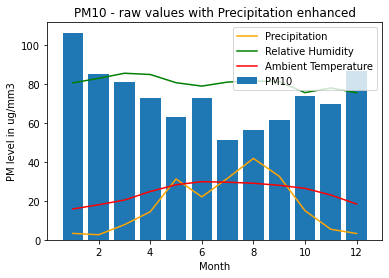

In [9]:
#Plot results

#PM10
plt.bar(new_df.Month, new_df.PM10)
plt.plot(new_df.Month, new_df.Precipitation, color = 'orange')
plt.plot(new_df.Month, new_df['Relative Humidity'], color = 'green')
plt.plot(new_df.Month, new_df['Ambient Temperature'], color = 'red')
plt.legend(["Precipitation", "Relative Humidity", "Ambient Temperature", "PM10"])
plt.title("PM10 - raw values with Precipitation enhanced")
plt.xlabel("Month")
plt.ylabel("PM level in ug/mm3")
plt.show()

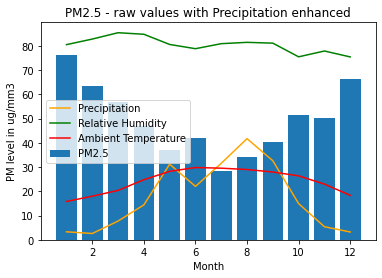

In [10]:
#PM2.5
plt.bar(new_df.Month, new_df['PM2.5'])
plt.plot(new_df.Month, new_df.Precipitation, color = 'orange')
plt.plot(new_df.Month, new_df['Relative Humidity'], color = 'green')
plt.plot(new_df.Month, new_df['Ambient Temperature'], color = 'red')
plt.legend(["Precipitation", "Relative Humidity", "Ambient Temperature", "PM2.5"])
plt.title("PM2.5 - raw values with Precipitation enhanced")
plt.xlabel("Month")
plt.ylabel("PM level in ug/mm3")
plt.show()

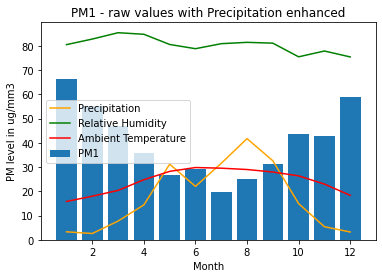

In [11]:
#PM1
plt.bar(new_df.Month, new_df.PM1)
plt.plot(new_df.Month, new_df.Precipitation, color = 'orange')
plt.plot(new_df.Month, new_df['Relative Humidity'], color = 'green')
plt.plot(new_df.Month, new_df['Ambient Temperature'], color = 'red')
plt.legend(["Precipitation", "Relative Humidity", "Ambient Temperature", "PM1"])
plt.title("PM1 - raw values with Precipitation enhanced")
plt.xlabel("Month")
plt.ylabel("PM level in ug/mm3")
plt.show()

In [12]:
#Normalise means
new_df.PM10 = (new_df.PM10 - new_df.PM10.min())/(new_df.PM10.max()-new_df.PM10.min())
new_df['PM2.5'] = (new_df['PM2.5'] - new_df['PM2.5'].min())/(new_df['PM2.5'].max()-new_df['PM2.5'].min())
new_df.PM1 = (new_df.PM1 - new_df.PM1.min())/(new_df.PM1.max()-new_df.PM1.min())
new_df['Relative Humidity'] = (new_df['Relative Humidity'] - new_df['Relative Humidity'].min())/(new_df['Relative Humidity'].max()-new_df['Relative Humidity'].min())
new_df.Precipitation = (new_df.Precipitation - new_df.Precipitation.min())/(new_df.Precipitation.max()-new_df.Precipitation.min())
new_df['Ambient Temperature'] = (new_df['Ambient Temperature'] - new_df['Ambient Temperature'].min())/(new_df['Ambient Temperature'].max()-new_df['Ambient Temperature'].min())
new_df

,Month,PM10,PM2.5,PM1,Relative Humidity,Precipitation,Ambient Temperature
0,1.0,1.000000,1.000000,1.000000,0.507630,0.017678,0.000000
1,2.0,0.611996,0.730891,0.761710,0.738061,0.000000,0.155139
2,3.0,0.544431,0.595216,0.588368,1.000000,0.131201,0.326150
3,4.0,0.395978,0.387630,0.343792,0.935599,0.301684,0.640621
4,5.0,0.219314,0.181758,0.149044,0.514914,0.730640,0.886927
5,6.0,0.395742,0.286299,0.208227,0.339767,0.496630,1.000000
6,7.0,0.000000,0.000000,0.000000,0.547069,0.740022,0.980550
7,8.0,0.093226,0.117886,0.117335,0.602487,1.000000,0.941558
8,9.0,0.189932,0.253256,0.247460,0.568813,0.766807,0.867639
9,10.0,0.416384,0.484359,0.513814,0.004369,0.315123,0.754810


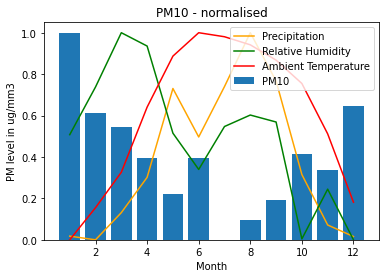

In [13]:
#Plot results

#PM10
plt.bar(new_df.Month, new_df.PM10)
plt.plot(new_df.Month, new_df.Precipitation, color = 'orange')
plt.plot(new_df.Month, new_df['Relative Humidity'], color = 'green')
plt.plot(new_df.Month, new_df['Ambient Temperature'], color = 'red')
plt.legend(["Precipitation", "Relative Humidity", "Ambient Temperature", "PM10"])
plt.title("PM10 - normalised")
plt.xlabel("Month")
plt.ylabel("PM level in ug/mm3")
plt.show()

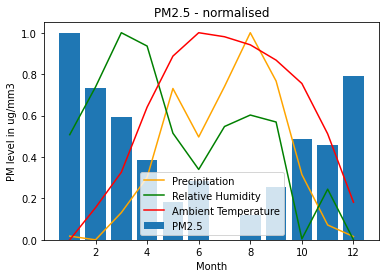

In [14]:
#Plot results

#PM2.5
plt.bar(new_df.Month, new_df['PM2.5'])
plt.plot(new_df.Month, new_df.Precipitation, color = 'orange')
plt.plot(new_df.Month, new_df['Relative Humidity'], color = 'green')
plt.plot(new_df.Month, new_df['Ambient Temperature'], color = 'red')
plt.legend(["Precipitation", "Relative Humidity", "Ambient Temperature", "PM2.5"])
plt.title("PM2.5 - normalised")
plt.xlabel("Month")
plt.ylabel("PM level in ug/mm3")
plt.show()

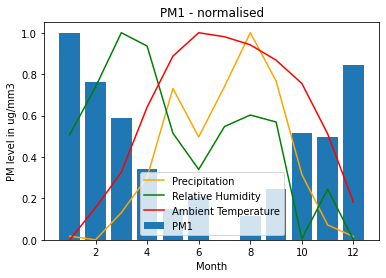

In [15]:
#Plot results

#PM1
plt.bar(new_df.Month, new_df.PM1)
plt.plot(new_df.Month, new_df.Precipitation, color = 'orange')
plt.plot(new_df.Month, new_df['Relative Humidity'], color = 'green')
plt.plot(new_df.Month, new_df['Ambient Temperature'], color = 'red')
plt.legend(["Precipitation", "Relative Humidity", "Ambient Temperature", "PM1"])
plt.title("PM1 - normalised")
plt.xlabel("Month")
plt.ylabel("PM level in ug/mm3")
plt.show()

In [16]:
#heat map - PM10
heatmap_df10 = pd.DataFrame({'Month' : [], 'PM10 Classification' : []})

heatmap_df10['Month'] = data_frame.Month.copy(deep = True)
heatmap_df10['PM10 Classification'] = data_frame['PM10 Classification'].copy(deep = True)
heatmap_df10

,Month,PM10 Classification
0,1,Moderate
1,1,Moderate
2,1,Moderate
3,1,Moderate
4,1,Moderate
...,...,...
43470,12,Moderate
43471,12,Moderate
43472,12,Moderate
43473,12,Moderate


In [17]:
#add months to xlabels
xLabel = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
yLabel=[]

#Scan for classifications
heatmap_df10 = heatmap_df10.reset_index()
for index, row in heatmap_df10['PM10 Classification'].iteritems():
    pm_class = heatmap_df10.iloc[index]['PM10 Classification']
    if pm_class not in yLabel:
        yLabel.append(pm_class)

print(yLabel)

['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy']


In [18]:
#add classifications to ylabels
yLabel = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy']
yLabel

['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy']

In [19]:
#count number of occurences, store in list
#PM10
g_occurences = []
m_occurences = []
s_occurences = []
u_occurences = []

g_count = 0
m_count = 0
s_count = 0
u_count = 0

i = 1
while i <= 12:
    for index, row in heatmap_df10['PM10 Classification'].iteritems():
        if heatmap_df10.iloc[index]['PM10 Classification'] == 'Good' and heatmap_df10.iloc[index]['Month'] == i:
            g_count += 1

        if heatmap_df10.iloc[index]['PM10 Classification'] == 'Moderate' and heatmap_df10.iloc[index]['Month'] == i:
            m_count += 1            
            
        if heatmap_df10.iloc[index]['PM10 Classification'] == 'Unhealthy for Sensitive Groups' and heatmap_df10.iloc[index]['Month'] == i:
            s_count += 1 

        if heatmap_df10.iloc[index]['PM10 Classification'] == 'Unhealthy' and heatmap_df10.iloc[index]['Month'] == i:
            u_count += 1                  
            
    g_occurences.append(g_count)
    m_occurences.append(m_count)
    s_occurences.append(s_count)
    u_occurences.append(u_count)
    
    g_count = 0
    m_count = 0
    s_count = 0
    u_count = 0
    
    i += 1

In [20]:
print(g_occurences)
print(m_occurences)
print(s_occurences)
print(u_occurences)

[883, 1157, 1429, 1764, 1831, 1447, 2278, 2134, 2214, 1588, 1465, 1136]
[2377, 2027, 2608, 1823, 1702, 1785, 898, 1230, 1843, 1526, 1277, 1714]
[701, 293, 305, 269, 117, 183, 111, 103, 117, 278, 184, 327]
[120, 20, 22, 28, 5, 21, 5, 13, 5, 43, 20, 49]


In [21]:
#reconstruct dataframe, only containing months and number of occurences

In [22]:
heatmap_df10 = pd.DataFrame({'PM10 Good Occurences' : [],
                           'PM10 Moderate Occurences' : [],
                           'PM10 Unhealthy for Sensitive Groups Occurences' : [],
                           'PM10 Unhealthy Occurences' : []})

heatmap_df10

,PM10 Good Occurences,PM10 Moderate Occurences,PM10 Unhealthy for Sensitive Groups Occurences,PM10 Unhealthy Occurences


In [23]:
new_array = []
new_array.append(g_occurences)
new_array.append(m_occurences)
new_array.append(s_occurences)
new_array.append(u_occurences)

heatmap_df10 = pd.DataFrame(new_array)
heatmap_df10 = heatmap_df10.transpose()
heatmap_df10 = heatmap_df10.rename(columns={0: "Good", 
                                        1: "Moderate",
                                        2: "Unhealthy for Sensitive Groups",
                                        3: "Unhealthy"})



heatmap_df10 = heatmap_df10.transpose()

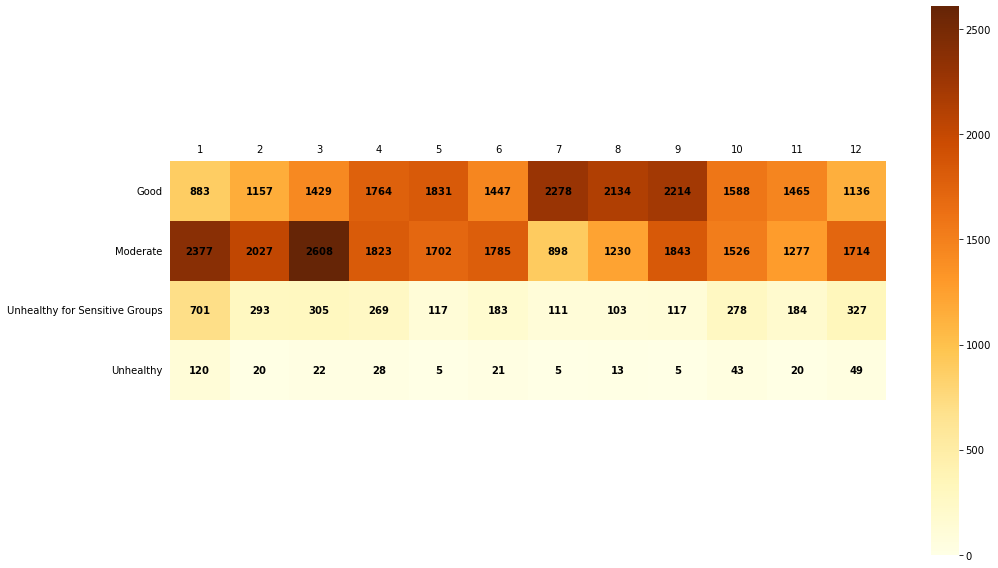

In [24]:
plt.figure(figsize=(15, 8))
sb.heatmap(heatmap_df10,
          cmap = 'YlOrBr',
          vmin = 0,
          xticklabels = xLabel,
          yticklabels = yLabel,
          annot = True,
          square = True,
          annot_kws = {'fontsize': 10, 'fontweight': 'bold', 'color': 'black'},
          fmt='g')
plt.yticks(rotation=0)
plt.tick_params(
    which = 'both',
    bottom = False,
    left = False,
    labelbottom = False,
    labeltop = True)
plt.tight_layout();

<Figure size 1440x1080 with 0 Axes>

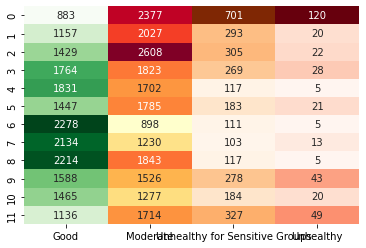

In [25]:
plt.figure(figsize=(20, 15))

colours = ['Greens', 'YlOrRd', 'Oranges', 'Reds', 'Purples']

heatmap_df10 = heatmap_df10.transpose()

f, axs = plt.subplots(1, heatmap_df10.columns.size, gridspec_kw={'wspace': 0})
for i, (s, a, c) in enumerate(zip(heatmap_df10.columns, axs, colours)):
    sb.heatmap(np.array([heatmap_df10[s].values]).T, yticklabels=heatmap_df10.index, xticklabels=[s], annot=True, fmt='g', ax=a, cmap=c, cbar=False)
    if i>0:
        a.yaxis.set_ticks([])



In [26]:
#PM2.5 heatmap
heatmap_df25 = pd.DataFrame({'Month' : [], 'PM2.5 Classification' : []})

heatmap_df25['Month'] = data_frame.Month.copy(deep = True)
heatmap_df25['PM2.5 Classification'] = data_frame['PM2.5 Classification'].copy(deep = True)
heatmap_df25

,Month,PM2.5 Classification
0,1,Unhealthy
1,1,Unhealthy
2,1,Unhealthy
3,1,Unhealthy
4,1,Unhealthy
...,...,...
43470,12,Unhealthy
43471,12,Unhealthy
43472,12,Unhealthy
43473,12,Unhealthy


In [27]:
g_occurences = []
m_occurences = []
s_occurences = []
u_occurences = []
v_occurences = []

g_count = 0
m_count = 0
s_count = 0
u_count = 0
v_count = 0

i = 1
while i <= 12:
    for index, row in heatmap_df25['PM2.5 Classification'].iteritems():
        if heatmap_df25.iloc[index]['PM2.5 Classification'] == 'Good' and heatmap_df25.iloc[index]['Month'] == i:
            g_count += 1

        if heatmap_df25.iloc[index]['PM2.5 Classification'] == 'Moderate' and heatmap_df25.iloc[index]['Month'] == i:
            m_count += 1            
            
        if heatmap_df25.iloc[index]['PM2.5 Classification'] == 'Unhealthy for Sensitive Groups' and heatmap_df25.iloc[index]['Month'] == i:
            s_count += 1 

        if heatmap_df25.iloc[index]['PM2.5 Classification'] == 'Unhealthy' and heatmap_df25.iloc[index]['Month'] == i:
            u_count += 1              

        if heatmap_df25.iloc[index]['PM2.5 Classification'] == 'Very Unhealthy' and heatmap_df25.iloc[index]['Month'] == i:
            v_count += 1     
            
    g_occurences.append(g_count)
    m_occurences.append(m_count)
    s_occurences.append(s_count)
    u_occurences.append(u_count)
    v_occurences.append(v_count)
    
    g_count = 0
    m_count = 0
    s_count = 0
    u_count = 0
    v_count = 0
    
    i += 1

In [28]:
print(g_occurences)
print(m_occurences)
print(s_occurences)
print(u_occurences)
print(v_occurences)

[10, 30, 7, 116, 232, 165, 410, 372, 159, 142, 164, 54]
[586, 882, 974, 1425, 1850, 1718, 2150, 1881, 2010, 1297, 1130, 852]
[1015, 853, 1494, 1217, 972, 791, 438, 725, 1150, 848, 644, 702]
[2182, 1626, 1837, 1095, 594, 709, 282, 486, 847, 1048, 932, 1461]
[288, 106, 52, 31, 7, 53, 12, 16, 13, 100, 76, 157]


In [29]:
heatmap_df25 = pd.DataFrame({'PM2.5 Good Occurences' : [],
                           'PM2.5 Moderate Occurences' : [],
                           'PM2.5 Unhealthy for Sensitive Groups Occurences' : [],
                           'PM2.5 Unhealthy Occurences' : [],
                           'PM2.5 Very Unhealthy Occurences' : []})

heatmap_df25

,PM2.5 Good Occurences,PM2.5 Moderate Occurences,PM2.5 Unhealthy for Sensitive Groups Occurences,PM2.5 Unhealthy Occurences,PM2.5 Very Unhealthy Occurences


In [30]:
new_array = []
new_array.append(g_occurences)
new_array.append(m_occurences)
new_array.append(s_occurences)
new_array.append(u_occurences)
new_array.append(v_occurences)

heatmap_df25 = pd.DataFrame(new_array)
heatmap_df25 = heatmap_df25.transpose()
heatmap_df25 = heatmap_df25.rename(columns={0: "Good", 
                                        1: "Moderate",
                                        2: "Unhealthy for Sensitive Groups",
                                        3: "Unhealthy",
                                        4: "Very Unhealthy"})



heatmap_df25 = heatmap_df25.transpose()

In [31]:
yLabel = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy']
yLabel

['Good',
 'Moderate',
 'Unhealthy for Sensitive Groups',
 'Unhealthy',
 'Very Unhealthy']

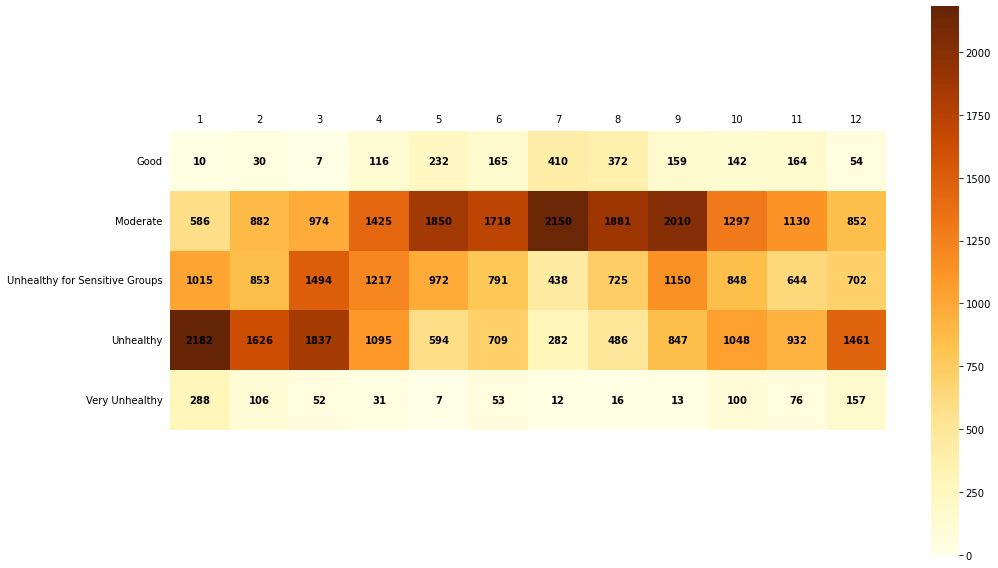

In [32]:
plt.figure(figsize=(15, 8))
sb.heatmap(heatmap_df25,
          cmap = 'YlOrBr',
          vmin = 0,
          xticklabels = xLabel,
          yticklabels = yLabel,
          annot = True,
          square = True,
          annot_kws = {'fontsize': 10, 'fontweight': 'bold', 'color': 'black'},
          fmt='g')
plt.yticks(rotation=0)
plt.tick_params(
    which = 'both',
    bottom = False,
    left = False,
    labelbottom = False,
    labeltop = True)
plt.tight_layout();

In [33]:
heatmap_df25

,0,1,2,3,4,5,6,7,8,9,10,11
Good,10,30,7,116,232,165,410,372,159,142,164,54
Moderate,586,882,974,1425,1850,1718,2150,1881,2010,1297,1130,852
Unhealthy for Sensitive Groups,1015,853,1494,1217,972,791,438,725,1150,848,644,702
Unhealthy,2182,1626,1837,1095,594,709,282,486,847,1048,932,1461
Very Unhealthy,288,106,52,31,7,53,12,16,13,100,76,157


<Figure size 1440x1080 with 0 Axes>

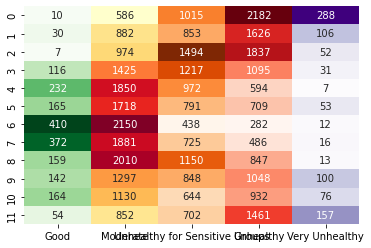

In [34]:
plt.figure(figsize=(20, 15))

colours = ['Greens', 'YlOrRd', 'Oranges', 'Reds', 'Purples']

heatmap_df25 = heatmap_df25.transpose()

f, axs = plt.subplots(1, heatmap_df25.columns.size, gridspec_kw={'wspace': 0})
for i, (s, a, c) in enumerate(zip(heatmap_df25.columns, axs, colours)):
    sb.heatmap(np.array([heatmap_df25[s].values]).T, yticklabels=heatmap_df25.index, xticklabels=[s], annot=True, fmt='g', ax=a, cmap=c, cbar=False)
    if i>0:
        a.yaxis.set_ticks([])



In [35]:
#PM1 heatmap
heatmap_df1 = pd.DataFrame({'Month' : [], 'PM1 Classification' : []})

heatmap_df1['Month'] = data_frame.Month.copy(deep = True)
heatmap_df1['PM1 Classification'] = data_frame['PM1 Classification'].copy(deep = True)
heatmap_df1

,Month,PM1 Classification
0,1,Hazardous
1,1,Hazardous
2,1,Hazardous
3,1,Hazardous
4,1,Hazardous
...,...,...
43470,12,Hazardous
43471,12,Hazardous
43472,12,Hazardous
43473,12,Hazardous


In [36]:
#add months to xlabels
xLabel = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
yLabel=[]

#Scan for classifications
for index, row in heatmap_df1['PM1 Classification'].iteritems():
    pm_class = heatmap_df1.iloc[index]['PM1 Classification']
    if pm_class not in yLabel:
        yLabel.append(pm_class)

print(yLabel)

['Hazardous', 'Very Unhealthy', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Moderate']


In [37]:
yLabel = ['Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
yLabel

['Moderate',
 'Unhealthy for Sensitive Groups',
 'Unhealthy',
 'Very Unhealthy',
 'Hazardous']

In [38]:
#count number of occurences, store in list
#PM1
m_occurences = []
s_occurences = []
u_occurences = []
v_occurences = []
h_occurences = []

m_count = 0
s_count = 0
u_count = 0
v_count = 0
h_count = 0

i = 1
while i <= 12:
    for index, row in heatmap_df1['PM1 Classification'].iteritems():
        if heatmap_df1.iloc[index]['PM1 Classification'] == 'Moderate' and heatmap_df1.iloc[index]['Month'] == i:
            m_count += 1            
            
        if heatmap_df1.iloc[index]['PM1 Classification'] == 'Unhealthy for Sensitive Groups' and heatmap_df1.iloc[index]['Month'] == i:
            s_count += 1 

        if heatmap_df1.iloc[index]['PM1 Classification'] == 'Unhealthy' and heatmap_df1.iloc[index]['Month'] == i:
            u_count += 1              

        if heatmap_df1.iloc[index]['PM1 Classification'] == 'Very Unhealthy' and heatmap_df1.iloc[index]['Month'] == i:
            v_count += 1   
            
        if heatmap_df1.iloc[index]['PM1 Classification'] == 'Hazardous' and heatmap_df1.iloc[index]['Month'] == i:
            h_count += 1     

    m_occurences.append(m_count)
    s_occurences.append(s_count)
    u_occurences.append(u_count)
    v_occurences.append(v_count)
    h_occurences.append(h_count)  

    m_count = 0
    s_count = 0
    u_count = 0
    v_count = 0
    h_count = 0
    
    i += 1

In [39]:
print(m_occurences)
print(s_occurences)
print(u_occurences)
print(v_occurences)
print(h_occurences)

[1, 10, 1, 12, 122, 200, 430, 237, 97, 50, 58, 15]
[14, 65, 18, 175, 399, 429, 778, 566, 414, 192, 258, 72]
[738, 1023, 1302, 2038, 2205, 1812, 1702, 1896, 2175, 1383, 1110, 945]
[1222, 968, 1834, 1084, 684, 596, 251, 554, 1039, 913, 723, 807]
[2106, 1431, 1209, 575, 245, 399, 131, 227, 454, 897, 797, 1387]


In [40]:
new_array = []
new_array.append(m_occurences)
new_array.append(s_occurences)
new_array.append(u_occurences)
new_array.append(v_occurences)
new_array.append(h_occurences)

heatmap_df1 = pd.DataFrame(new_array)
heatmap_df1 = heatmap_df1.transpose()
heatmap_df1 = heatmap_df1.rename(columns={0: "Moderate", 
                                        1: "Unhealthy for Sensitive Groups",
                                        2: "Unhealthy",
                                        3: "Very Unhealthy",
                                        4: "Hazardous"})



heatmap_df1 = heatmap_df1.transpose()

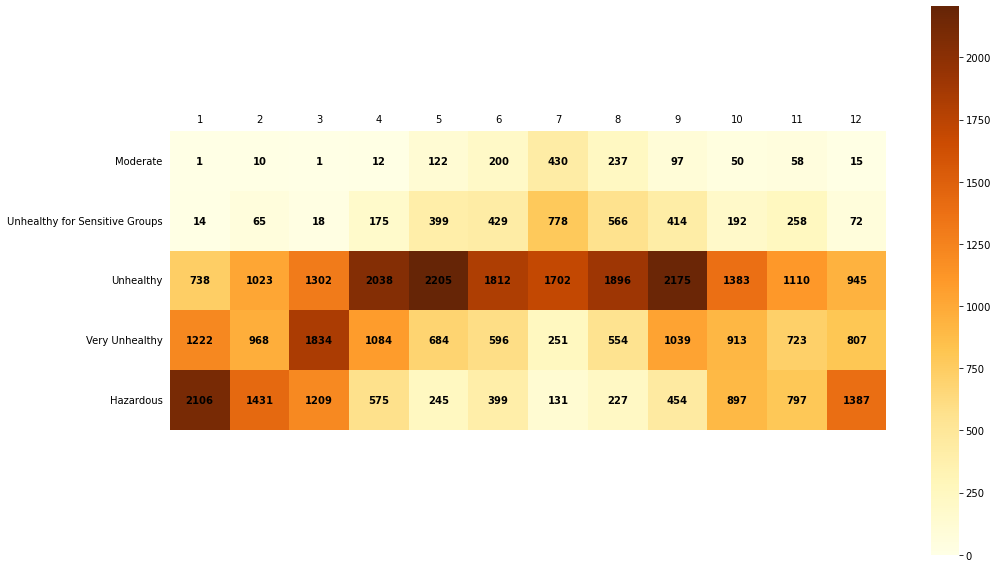

In [41]:
plt.figure(figsize=(15, 8))
sb.heatmap(heatmap_df1,
          cmap = 'YlOrBr',
          vmin = 0,
          xticklabels = xLabel,
          yticklabels = yLabel,
          annot = True,
          square = True,
          annot_kws = {'fontsize': 10, 'fontweight': 'bold', 'color': 'black'},
          fmt='g')
plt.yticks(rotation=0)
plt.tick_params(
    which = 'both',
    bottom = False,
    left = False,
    labelbottom = False,
    labeltop = True)
plt.tight_layout();

<Figure size 1440x1080 with 0 Axes>

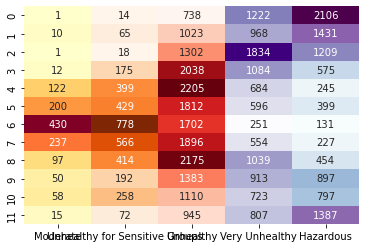

In [42]:
plt.figure(figsize=(20, 15))

colours = ['YlOrRd', 'Oranges', 'Reds', 'Purples', 'BuPu']

heatmap_df1 = heatmap_df1.transpose()

f, axs = plt.subplots(1, heatmap_df1.columns.size, gridspec_kw={'wspace': 0})
for i, (s, a, c) in enumerate(zip(heatmap_df1.columns, axs, colours)):
    sb.heatmap(np.array([heatmap_df1[s].values]).T, yticklabels=heatmap_df1.index, xticklabels=[s], annot=True, fmt='g', ax=a, cmap=c, cbar=False)
    if i>0:
        a.yaxis.set_ticks([])

In [ ]:
    
    
    #heat map - PM10
    heatmap_df10 = pd.DataFrame({'Month' : [], 'PM10 Classification' : []})

    heatmap_df10['Month'] = data_frame.Month.copy(deep = True)
    heatmap_df10['PM10 Classification'] = data_frame['PM10 Classification'].copy(deep = True)
    
    #add months to xlabels
    xLabel = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    yLabel = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy']
    
    heatmap_df10 = heatmap_df10.reset_index()
    
    #count occurences
    g_occurences = []
    m_occurences = []
    s_occurences = []
    u_occurences = []

    g_count = 0
    m_count = 0
    s_count = 0
    u_count = 0
    
    heatmap_df10.to_csv('test1.csv')
    
    i = 1
    while i <= 12:
        for index, row in heatmap_df10['PM10 Classification'].iteritems():
            if heatmap_df10.iloc[index]['PM10 Classification'] == 'Good' and heatmap_df10.iloc[index]['Month'] == i:
                g_count += 1

            if heatmap_df10.iloc[index]['PM10 Classification'] == 'Moderate' and heatmap_df10.iloc[index]['Month'] == i:
                m_count += 1            

            if heatmap_df10.iloc[index]['PM10 Classification'] == 'Unhealthy for Sensitive Groups' and heatmap_df10.iloc[index]['Month'] == i:
                s_count += 1 

            if heatmap_df10.iloc[index]['PM10 Classification'] == 'Unhealthy' and heatmap_df10.iloc[index]['Month'] == i:
                u_count += 1              
   

        g_occurences.append(g_count)
        m_occurences.append(m_count)
        s_occurences.append(s_count)
        u_occurences.append(u_count)

        g_count = 0
        m_count = 0
        s_count = 0
        u_count = 0

        i += 1
        
    #reconstruct dataframe, only containing months and number of occurences
    heatmap_df10 = pd.DataFrame({'PM10 Good Occurences' : [],
                           'PM10 Moderate Occurences' : [],
                           'PM10 Unhealthy for Sensitive Groups Occurences' : [],
                           'PM10 Unhealthy Occurences' : []})

    new_array = []
    new_array.append(g_occurences)
    new_array.append(m_occurences)
    new_array.append(s_occurences)
    new_array.append(u_occurences)

    heatmap_df10 = pd.DataFrame(new_array)
    heatmap_df10 = heatmap_df10.transpose()
    heatmap_df10 = heatmap_df10.rename(columns={0: "Good", 
                                            1: "Moderate",
                                            2: "Unhealthy for Sensitive Groups",
                                            3: "Unhealthy"})



    heatmap_df10 = heatmap_df10.transpose()
    
    plt.figure(figsize=(15, 8))
    sb.heatmap(heatmap_df10,
              cmap = 'YlOrBr',
              vmin = 0,
              xticklabels = xLabel,
              yticklabels = yLabel,
              annot = True,
              square = True,
              annot_kws = {'fontsize': 10, 'fontweight': 'bold', 'color': 'black'},
              fmt='g')
    plt.yticks(rotation=0)
    plt.tick_params(
        which = 'both',
        bottom = False,
        left = False,
        labelbottom = False,
        labeltop = True)
    plt.tight_layout();
    
    #save heatmap 1
    
    plt.figure(figsize=(20, 15))
    colours = ['Greens', 'YlOrRd', 'Oranges', 'Reds', 'Purples']

    heatmap_df10 = heatmap_df10.transpose()

    f, axs = plt.subplots(1, heatmap_df10.columns.size, gridspec_kw={'wspace': 0})
    for i, (s, a, c) in enumerate(zip(heatmap_df10.columns, axs, colours)):
        heatmap2 = fig = sb.heatmap(np.array([heatmap_df10[s].values]).T, yticklabels=heatmap_df10.index, xticklabels=[s], annot=True, fmt='g', ax=a, cmap=c, cbar=False)
        if i>0:
            a.yaxis.set_ticks([])
            
    #save heatmap 2 for pm10
    heatmap_name = year + 'PM10.png'
    fig = heatmap2.get_figure()
    fig.savefig(heatmap_name)      


In [43]:
#regplot, x = humidity, y = pm level

In [44]:
#year-by-year
    #monthly
    #weekly
    #daily
    
#annual pmx / month